## Demonstration of statistical testing

In [1]:
import numpy as np
import pingouin as pg
import pandas as pd
import seaborn as sns
%matplotlib inline

Create a random number generator.

In [2]:
rng = np.random.default_rng()

In [3]:
a = rng.standard_normal(15)

In [ ]:
Check that the data is normally distributed.

In [4]:
pg.normality(a)

,W,pval,normal
0,0.989596,0.999228,True


In [6]:
a.mean()

np.float64(-0.18482199104069227)

Check against the null hypothesis that the mean of the array is .45.

In [7]:
pg.ttest(a,.45)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.092505,14,two-sided,0.00795,"[-0.63, 0.26]",0.798481,6.73,0.819886


Experimentation with different values to see what happens.

In [9]:
pg.ttest(a,-.20)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.073939,14,two-sided,0.942105,"[-0.63, 0.26]",0.019091,0.263,0.050546


In [10]:
pg.ttest(a,-.20,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.073939,14,greater,0.471053,"[-0.55, inf]",0.019091,0.526,0.057697


In [12]:
pg.ttest(a,-.20,alternative='less')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.073939,14,less,0.528947,"[-inf, 0.18]",0.019091,0.526,0.043144


In [13]:
tips = sns.load_dataset('tips')

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

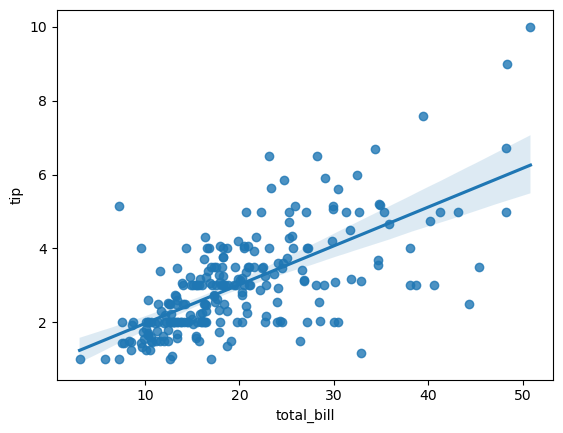

In [15]:
sns.regplot(x='total_bill',y='tip',data=tips)

In [16]:
pg.linear_regression(tips['tip'],tips['total_bill'])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,6.750284,1.006398,6.707369,1.389521e-10,0.456617,0.454371,4.767865,8.732702
1,tip,4.347714,0.304881,14.260355,6.692471e-34,0.456617,0.454371,3.747155,4.948274


In [17]:
pg.list_dataset()

,description,useful,ref
dataset,,,
ancova,Teaching method with family income as covariate,ANCOVA,www.real-statistics.com
anova,Pain threshold per hair color,anova - pairwise_tukey,McClave and Dietrich 1991
anova2,Fertilizer impact on the yield of crops,anova,www.real-statistics.com
anova2_unbalanced,Diet and exercise impact,anova,http://onlinestatbook.com/2/analysis_of_varian...
anova3,Cholesterol in different groups,anova,Pingouin
anova3_unbalanced,Cholesterol in different groups,anova,Pingouin
blandaltman,Hypothetical data of an agreement between two ...,plot_blandaltman,https://www.biochemia-medica.com/en/journal/25...
chi2_independence,Patients' attributes and heart conditions,chi2_independence,https://archive.ics.uci.edu/ml/datasets/Heart+...
chi2_mcnemar,Responses to 2 athlete's foot treatments,chi2_mcnemar,http://www.stat.purdue.edu/~tqin/system101/me...


In [18]:
penguins = pg.read_dataset('penguins')

In [19]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,female
1,Adelie,Biscoe,37.7,18.7,180.0,3600.0,male
2,Adelie,Biscoe,35.9,19.2,189.0,3800.0,female
3,Adelie,Biscoe,38.2,18.1,185.0,3950.0,male
4,Adelie,Biscoe,38.8,17.2,180.0,3800.0,male


In [21]:
pg.anova(data=penguins,dv='flipper_length_mm',between='species').round(2)

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,339,594.8,0.0,0.78


In [22]:
pg.kruskal(data=penguins,dv='flipper_length_mm',between='species').round(2)

,Source,ddof1,H,p-unc
Kruskal,species,2,244.89,0.0


In [23]:
pg.mwu(a,.45)

IndexError: tuple index out of range

In [5]:
a = rng.random(15)
b =  rng.random(15)

In [6]:
pg.mwu(a,b)

,U-val,alternative,p-val,RBC,CLES
MWU,118.0,two-sided,0.835705,0.048889,0.524444
